In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
m1 = [4, 4]
m2 = [8, 8]

cov1 = [[1,0], [0, 1]]
cov2 = [[2,0.5], [0.5, 2]]

dist1 = np.random.multivariate_normal(m1, cov1, 500)
dist2 = np.random.multivariate_normal(m2, cov2, 500)

In [3]:
# ones = np.full((dist1.shape[0],1), 1)
# twos = np.full((dist2.shape[0],1), 2)
# cat1 = np.hstack([ones, dist1])
# cat2 = np.hstack([twos, dist2])
# cat1.shape()


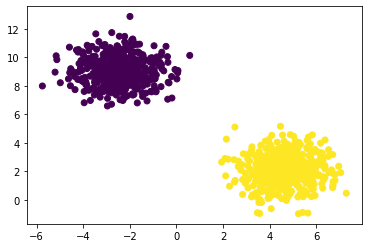

In [4]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=1000, centers = 2, random_state=42) # Center means how many diff clusters
plt.scatter(X[:,0], X[:,1], c=y)

In [5]:
class KNN:
    def __init__(self, k =10):
        self.X= None
        self.y= None
        self.k= k
    
    def fit(self, X,y):
        self.X= X
        self.y= y
    
    def predict(self, point):
        distances= []
        for x_item, y_item in zip(self.X, self.y):
            dis = KNN.distance(point, x_item)
            distances.append((dis,y_item))
        distances = sorted(distances)
        top = np.array(distances[:self.k])
        
        vals, counts = np.unique(top[:,1], return_counts= True) #
        
        return vals[np.argmax(counts)]        
        
    @classmethod # Static method
    def distance(cls, p1,p2):
        return np.sum((p1-p2)**2)
    

In [6]:
model = KNN (10)
from sklearn.model_selection import train_test_split


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
model.fit(X_train,y_train)

In [8]:
for point in X_test[:10]:
    print(model.predict(point))

1.0
0.0
1.0
1.0
0.0
1.0
0.0
0.0
0.0
1.0


In [9]:
print(y_test[:10])

[1 0 1 1 0 1 0 0 0 1]


In [10]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_train,y_train)



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [11]:
model.score(X_test,y_test)
model.predict(X_test[:10])

array([1, 0, 1, 1, 0, 1, 0, 0, 0, 1])

# Pandas

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

s1 = pd.Series([1,2,3,4,5,6])
s2 = pd.Series(['sahaj', 'oberoi', 'yo'])

In [13]:
df1= pd.DataFrame([{"apple":'red fruit'}])

df2= pd.DataFrame({"names":['sahaj','oberoi'],
                    "ages": [20,19]})
df1.head()
df2.head()

,names,ages
0,sahaj,20
1,oberoi,19


In [14]:
df = pd.read_csv('mnist_train_small.csv')
df.head()

,Unnamed: 0,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(8000, 784)
(784,)


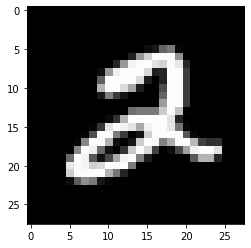

In [15]:
val= df.values
X = val[:, 2:]
y= val[:,1]

print(X.shape) # Shape is (8000,784)
print(X[4].shape) # here shape comes as (784,)
img = X[4].reshape(28,28) # therefore 784 are total pixel, image is of 28x28 size, hence we are reshaping 
plt.imshow(img, cmap='gray')


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
model.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [17]:
print(model.predict(X_test[:10]))
print(y_test[:10])

[9 1 4 8 0 8 2 2 4 0]
[9 1 4 8 0 8 2 2 4 8]


# Train on your own KNN Class ^^^^^^^

In [18]:
import pandas as pd
import numpy as np

pixels = [np.zeros([100,100],dtype= float), np.ones([100,100],dtype= float)]
name = ['black', 'white']

dict = {'name': name,
        'image': pixels}

df = pd.DataFrame(dict)
print(df)

    name                                              image
0  black  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
1  white  [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...


# SELF TRY

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [11]:
df = pd.read_csv('face_data.csv')
#from numpy import genfromtxt
#df = genfromtxt('face_data.csv')
x= df.iloc[:, 1:].values
X= x[:,0]
# y=df.iloc[:,0].values
X

array(['[36 35 33 ...  7 14 19]', '[206 206 205 ... 251 250 244]',
       '[169 169 169 ... 252 252 252]', '[22 28 29 ...  4  3  4]',
       '[20 18 16 ...  6  5  5]', '[252 252 252 ... 252 252 252]',
       '[155 155 157 ...  96  95  93]', '[69 78 58 ...  4  4  4]',
       '[41 39 41 ... 12 19 24]', '[242 244 237 ... 172 192 193]',
       '[41 39 36 ...  4  7  9]', '[ 90  86  83 ... 252 252 252]',
       '[252 252 252 ... 252 252 252]', '[35 33 32 ... 53 59 60]',
       '[29 28 30 ... 53 59 63]', '[202 203 203 ... 157 151 149]',
       '[138 137 135 ...  72  71  69]', '[188 131 113 ... 244 244 244]',
       '[252 250 236 ... 252 252 252]', '[233 220 200 ... 253 252 252]',
       '[117 111 105 ... 217 229 249]', '[104 102 101 ... 252 252 252]',
       '[16 12 15 ...  7  8  7]', '[78 17 16 ...  7  8  7]',
       '[106 102 100 ... 202 245 253]', '[117 114 111 ... 132 123 122]',
       '[ 43  41  44 ... 103 111 119]', '[37 38 35 ... 14 24 33]',
       '[29 25 24 ...  7  8  6]', '[25 24 22

In [ ]:

#plt.imshow(img, cmap='gray')

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# model.fit(X,y)

In [ ]:
np.array()